In [1]:
import requests
import time, datetime
import getpass
import warnings

In [2]:
api = getpass.getpass()

········


In [3]:
warnings.filterwarnings('ignore')

In [4]:
start = datetime.datetime(2018,1,1,0,0)
pred = {}
for day in range(366):
    t = int((start+datetime.timedelta(day)).timestamp())
    print(day, t)
    r = requests.get("https://api.darksky.net/forecast/{}/28.7041,77.1025,{}".format(api, t),
                verify=False)
    pred[day] = r.json()

0 1514745000
1 1514831400
2 1514917800
3 1515004200
4 1515090600
5 1515177000
6 1515263400
7 1515349800
8 1515436200
9 1515522600
10 1515609000
11 1515695400
12 1515781800
13 1515868200
14 1515954600
15 1516041000
16 1516127400
17 1516213800
18 1516300200
19 1516386600
20 1516473000
21 1516559400
22 1516645800
23 1516732200
24 1516818600
25 1516905000
26 1516991400
27 1517077800
28 1517164200
29 1517250600
30 1517337000
31 1517423400
32 1517509800
33 1517596200
34 1517682600
35 1517769000
36 1517855400
37 1517941800
38 1518028200
39 1518114600
40 1518201000
41 1518287400
42 1518373800
43 1518460200
44 1518546600
45 1518633000
46 1518719400
47 1518805800
48 1518892200
49 1518978600
50 1519065000
51 1519151400
52 1519237800
53 1519324200
54 1519410600
55 1519497000
56 1519583400
57 1519669800
58 1519756200
59 1519842600
60 1519929000
61 1520015400
62 1520101800
63 1520188200
64 1520274600
65 1520361000
66 1520447400
67 1520533800
68 1520620200
69 1520706600
70 1520793000
71 1520879400
72

In [6]:
import pickle

In [7]:
pickle.dump(pred,open('wind.pkl','wb'))

In [8]:
out = {}
start = datetime.datetime(2018,1,1,0,0)
for day in range(366):
    try:
        e = start+datetime.timedelta(day)

        t = int((start+datetime.timedelta(day)).timestamp())
        for h in range(24):
            d = pred[day]['hourly']['data'][h]
            if d['windSpeed']==0:
                out[e + datetime.timedelta(1.*h/24)] = {'ws':0, 'wd':0}
            else:
                out[e + datetime.timedelta(1.*h/24)] = {'ws':d['windSpeed'], 'wd':d['windBearing']}
    except:
        pass


In [9]:
import pandas as pd

In [10]:
df = pd.DataFrame(out).T

In [11]:
%matplotlib inline

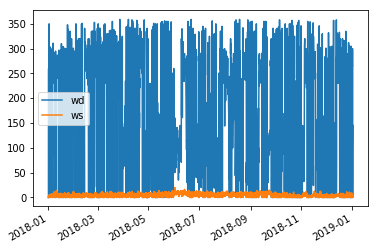

In [12]:
df.plot()

In [17]:
pm_df = pd.read_csv("/home/nipunbatra-pc/Downloads/pm25-2018.csv")

In [20]:
pm_df.query('location=="IGI Airport Terminal-3, Delhi - IMD"')

,local,location,city,country,value,unit,latitude,longitude
2,2018-01-01 05:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,262.32,µg/m³,NaN,NaN
27,2018-01-01 06:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,217.72,µg/m³,NaN,NaN
48,2018-01-01 07:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,209.62,µg/m³,NaN,NaN
70,2018-01-01 08:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,155.41,µg/m³,NaN,NaN
90,2018-01-01 09:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,167.47,µg/m³,NaN,NaN
109,2018-01-01 10:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,217.15,µg/m³,NaN,NaN
119,2018-01-01 11:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,274.86,µg/m³,NaN,NaN
142,2018-01-01 12:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,306.13,µg/m³,NaN,NaN
176,2018-01-01 13:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,252.82,µg/m³,NaN,NaN
207,2018-01-01 14:30:00+05:30,"IGI Airport Terminal-3, Delhi - IMD",Delhi,IN,145.62,µg/m³,NaN,NaN


In [22]:
locations = ['IGI Airport (T3), New Delhi - IMD', 
             'IGI Airport Terminal - 3, New Delhi - IMD', 
            'IGI Airport Terminal-3, Delhi - IMD']

In [23]:
dfs = []
for l in locations:
    dfs.append(pm_df.query("location==@l"))


In [30]:
igi_df = pd.concat(dfs)

In [31]:
igi_df.index = pd.to_datetime(igi_df.local)

In [33]:
igi_df = igi_df['value']

In [37]:
igi_df = igi_df.sort_index()

In [42]:
igi_df = igi_df.resample("1H").mean()

In [43]:
igi_df.index

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               ...
               '2018-11-19 05:00:00', '2018-11-19 06:00:00',
               '2018-11-19 07:00:00', '2018-11-19 08:00:00',
               '2018-11-19 09:00:00', '2018-11-19 10:00:00',
               '2018-11-19 11:00:00', '2018-11-19 12:00:00',
               '2018-11-19 13:00:00', '2018-11-19 14:00:00'],
              dtype='datetime64[ns]', name='local', length=7743, freq='H')

In [44]:
common_ix = igi_df.index.intersection(df.index)

In [52]:
common_df = pd.DataFrame({'value':igi_df[common_ix].values, 
                          'ws':df.loc[common_ix]['ws'],
                          'wd':df.loc[common_ix]['wd']}, index=common_ix
                         )

In [54]:
common_df =common_df.dropna()

In [61]:
!rm pm25-wind.csv

In [59]:
common_df.index.name='date'

In [62]:
common_df.to_csv("pm25-wind.csv")